In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("record.csv")
df

,mask_percent,mlm_acc_each_epoch,mlm_loss_each_epoch
0,15,"[[0.33180474265371385, 0.41084897121824654, 0....","[[0.07434512674808502, 0.04399368539452553, 0...."
1,14,"[[0.33285103584347253, 0.4132851035843473, 0.4...","[[0.07755900919437408, 0.08269260823726654, 0...."
2,13,"[[0.3196505339065317, 0.40840382748578563, 0.4...","[[0.08544578403234482, 0.07022812217473984, 0...."
3,12,"[[0.3215590742996346, 0.41100791717417784, 0.4...","[[0.08821828663349152, 0.044293925166130066, 0..."
4,11,"[[0.3226237169323208, 0.40231995326712844, 0.4...","[[0.07371237128973007, 0.04995165765285492, 0...."
5,10,"[[0.321190261496844, 0.40099188458070334, 0.42...","[[0.09816623479127884, 0.07844021916389465, 0...."
6,9,"[[0.32103210321032105, 0.41854185418541856, 0....","[[0.04804087430238724, 0.030917227268218994, 0..."
7,8,"[[0.3546908064895368, 0.42158476369621445, 0.4...","[[0.0496857650578022, 0.0342731699347496, 0.03..."
8,7,"[[0.345125786163522, 0.42701781970649894, 0.44...","[[0.05311288312077522, 0.02872496284544468, 0...."
9,6,"[[0.34874847374847373, 0.4210927960927961, 0.4...","[[0.0631377249956131, 0.01983523741364479, 0.0..."


In [98]:
mask_range = [i for i in range(15, 5, -1)]

In [99]:
epochs = [i for i in range(10)]
mlm_acc = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][1][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_acc.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print(mlm_acc)

[[0.3243321016200324, 0.40547935794556117, 0.42375850731842524, 0.43508281237245405, 0.4524530608224413, 0.461377522890731, 0.4860615092381686, 0.502061801472899, 0.503247181550589, 0.5119194140972272], [0.32831278230400995, 0.4095297891644318, 0.4240262138211557, 0.4381587707732625, 0.45611227594222503, 0.46810385509153585, 0.48062920594765945, 0.5023055338803273, 0.5093809498617826, 0.5343152871917617], [0.3255185918443299, 0.40856149721519613, 0.43165327050910135, 0.4429710750246757, 0.4612706675721476, 0.4741108641675647, 0.4870091722632599, 0.50384173418038, 0.5237721263060222, 0.5266623833199969], [0.3258299286475633, 0.40786097864671544, 0.42904133542175416, 0.4411702944806597, 0.4607695082363825, 0.4738417497324877, 0.48983378621079654, 0.5078517491714442, 0.5169077331492581, 0.5434609098892501], [0.3298772337441355, 0.4129035088873314, 0.43895177220261994, 0.449711454780805, 0.46584736929145065, 0.4770186732683985, 0.5056022491308126, 0.5222435033414279, 0.5402338541947482, 0.

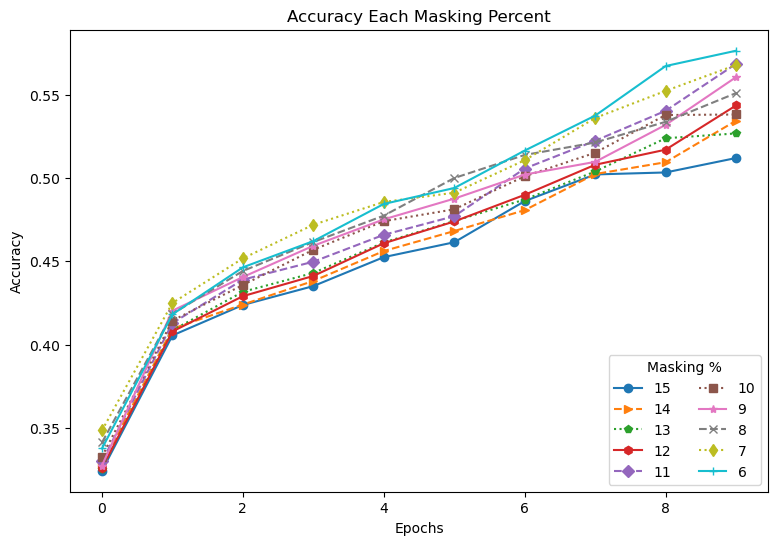

In [100]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(10):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

In [95]:
epochs = [i for i in range(10)]
mlm_loss = []
for i in mask_range:
    cur_mask = df[df["mask_percent"] == i]
    acc_this_percent = []
    for i in range(len(cur_mask)):
        acc_this_percent.append(cur_mask.iloc[i][2][2:-2].split(','))
        for j in range(len(acc_this_percent[-1])):
            acc_this_percent[-1][j] = float(acc_this_percent[-1][j])
    mlm_loss.append(np.mean(np.array(acc_this_percent), axis=0).tolist())
print(mlm_loss)

[[0.07145525763432185, 0.04538854087392489, 0.057104566444953285, 0.0555041233698527, 0.047737703969081245, 0.056322275350491204, 0.042793307453393936, 0.047985115398963295, 0.044004311164220176, 0.04276402418812116], [0.09721929331620534, 0.06796306495865186, 0.06192792703708013, 0.0551007849474748, 0.034823560466368995, 0.04020942188799381, 0.031278509025772415, 0.03742543545862039, 0.041455190628767014, 0.03612631931900978], [0.07579447701573372, 0.06396512190500896, 0.048824160049359, 0.04901650547981262, 0.04569438099861145, 0.034407702585061394, 0.05017745619018873, 0.028311757526050012, 0.030173245817422867, 0.03740441054105759], [0.06970720117290814, 0.0386207215487957, 0.05117384965221087, 0.038421206176280975, 0.04401020954052607, 0.03909580409526825, 0.03889121115207672, 0.03473051513234774, 0.02903813123703003, 0.02430053303639094], [0.06802986313899358, 0.041231012592713036, 0.046518818785746895, 0.03643575186530749, 0.04230832184354464, 0.031156267039477825, 0.03103070457

<function matplotlib.pyplot.show(close=None, block=None)>

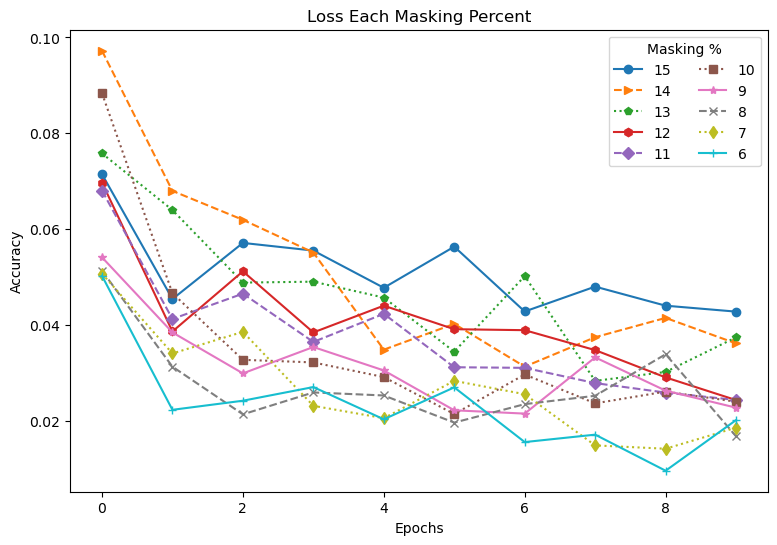

In [96]:
plt.title("Loss Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
for i in range(10):
    plt.plot(epochs, mlm_loss[i], linestyle=line_style[i], marker=mark[i])

plt.legend(mask_range, title = "Masking %", ncol = 2) 
plt.show